In [1]:
import pandas as pd
from sklearn.ensemble import  RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [27]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Data\Feature_selection\Filtered_Features.csv")

In [39]:
df2=pd.read_csv(r"C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Data\Preprosessed_data\Clustering.csv")

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        2022 non-null   int64  
 1   Unnamed: 0          2022 non-null   int64  
 2   name                2022 non-null   object 
 3   birth_date          2022 non-null   object 
 4   birth_place         2022 non-null   object 
 5   death_date          2022 non-null   object 
 6   death_place         2022 non-null   object 
 7   occupation          2022 non-null   object 
 8   awards              2022 non-null   object 
 9   alma_mater          2022 non-null   object 
 10  education           2022 non-null   object 
 11  spouse              2022 non-null   object 
 12  children            2022 non-null   object 
 13  occupation_cluster  2022 non-null   int64  
 14  birth_year          2022 non-null   float64
 15  death_year          2022 non-null   float64
 16  life_s

In [41]:
df2.head()

,Unnamed: 0.1,Unnamed: 0,name,birth_date,birth_place,death_date,death_place,occupation,awards,alma_mater,education,spouse,children,occupation_cluster,birth_year,death_year,life_span,life_span_cluster,edu_award_cluster,bio_cluster
0,0,0,Isaac Newton,{{Birth date|df=y|1643|01|04}},"{{nowrap|[[Woolsthorpe-by-Colsterworth]],}} Li...",{{Death date and age|df=y|1727|03|31|1643|01|04}},"[[Kensington]], Middlesex, England",Composer,{{unbulleted list | [[Fellow of the Royal Soci...,[[King's College London]],"[[Trinity College, Cambridge]] ([[Bachelor of ...",{{plainlist|,2,0,1643.0,1727.0,84.0,2.0,3,1
1,1,1,Marie Curie,{{birth date|df=y|1867|11|7}},"[[Warsaw]], [[Congress Poland|Poland]], Russia...",{{death date and age|df=y|1934|7|4|1867|11|7}},"[[Passy, Haute-Savoie|Passy]], [[Rhône-Alpes]]...",Composer,}},[[University of Paris]],[[Visva-Bharati University]] (dropped out)<ref...,{{plainlist|,2,0,1867.0,1934.0,67.0,2.0,1,0
2,2,2,Albert Einstein,{{Birth date|df=yes|1879|3|14}},"[[Ulm]], [[Kingdom of Württemberg]], Germany<r...",{{Death date and age|df=yes|1955|4|18|1879|3|14}},"[[Princeton, New Jersey]], U.S.",Composer,}},[[King's College London]],[[Visva-Bharati University]] (dropped out)<ref...,{{plainlist|,{{flatlist|,0,1879.0,1955.0,76.0,2.0,1,0
3,3,3,The Countess of Lovelace,{{birth date|df=y|1815|12|10}},"London, England",{{death date and age|df=y|1852|11|27|1815|12|10}},"[[Marylebone]], London, England",Composer,}},[[King's College London]],[[Visva-Bharati University]] (dropped out)<ref...,"{{marriage|[[William King-Noel, 1st Earl of Lo...",{{plainlist|,0,1815.0,1852.0,37.0,2.0,1,0
4,4,4,Leonardo da Vinci,{{birth date|df=yes|1452|04|15}},"possibly [[Anchiano]],{{efn|name=Birthplace}} ...",{{death date and age|df=yes|1519|5|2|1452|4|15}},"[[Clos Lucé]], [[Amboise]], {{awrap|[[Kingdom ...",Composer,}},[[King's College London]],Studio of [[Andrea del Verrocchio]],{{plainlist|,2,0,1452.0,1519.0,67.0,5.0,3,3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2022 non-null   int64  
 1   Unnamed: 0.2        2022 non-null   int64  
 2   name                2022 non-null   float64
 3   birth_date          2022 non-null   float64
 4   birth_place         2022 non-null   float64
 5   death_date          2022 non-null   float64
 6   death_place         2022 non-null   float64
 7   occupation          2022 non-null   float64
 8   awards              2022 non-null   float64
 9   alma_mater          2022 non-null   float64
 10  education           2022 non-null   float64
 11  spouse              2022 non-null   float64
 12  children            2022 non-null   float64
 13  occupation_cluster  2022 non-null   float64
 14  birth_year          2022 non-null   float64
 15  death_year          2022 non-null   float64
 16  life_s

In [29]:
df.head()

,Unnamed: 0,Unnamed: 0.2,name,birth_date,birth_place,death_date,death_place,occupation,awards,alma_mater,education,spouse,children,occupation_cluster,birth_year,death_year,life_span,life_span_cluster,edu_award_cluster,bio_cluster
0,0,0,-0.291212,-0.327866,1.812300,0.087552,0.863551,-0.513085,-0.028915,-0.279288,-0.743137,0.472636,-0.408171,-0.628548,1643.0,1727.0,84.0,2.0,1.272170,0.101081
1,1,1,0.318741,1.533003,1.601048,1.914421,1.470586,-0.513085,0.391234,2.474455,0.171651,0.472636,-0.408171,-0.628548,1867.0,1934.0,67.0,2.0,-0.573778,-0.867573
2,2,2,-1.611324,-0.390376,1.503151,0.013399,1.563185,-0.513085,0.391234,-0.279288,0.171651,0.472636,2.971872,-0.628548,1879.0,1955.0,76.0,2.0,-0.573778,-0.867573
3,3,3,1.251097,1.508961,-1.304951,1.880715,1.131058,-0.513085,0.391234,-0.279288,0.171651,0.382327,3.464111,-0.628548,1815.0,1852.0,37.0,2.0,-0.573778,-0.867573
4,4,4,0.170609,1.316623,1.740165,1.563878,0.174206,-0.513085,0.391234,-0.279288,-4.069640,0.472636,-0.408171,-0.628548,1452.0,1519.0,67.0,5.0,1.272170,2.038390


In [30]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df.drop('Unnamed: 0.2', axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                2022 non-null   float64
 1   birth_date          2022 non-null   float64
 2   birth_place         2022 non-null   float64
 3   death_date          2022 non-null   float64
 4   death_place         2022 non-null   float64
 5   occupation          2022 non-null   float64
 6   awards              2022 non-null   float64
 7   alma_mater          2022 non-null   float64
 8   education           2022 non-null   float64
 9   spouse              2022 non-null   float64
 10  children            2022 non-null   float64
 11  occupation_cluster  2022 non-null   float64
 12  birth_year          2022 non-null   float64
 13  death_year          2022 non-null   float64
 14  life_span           2022 non-null   float64
 15  life_span_cluster   2022 non-null   float64
 16  edu_aw

In [32]:
target = 'life_span'
X = df.drop(['life_span', target], axis=1)
y = df[target]

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor


preprocessor = StandardScaler()

# Pipeline yaratish
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=200,      
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        random_state=42
    ))
])

In [34]:
pipeline

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,learning_rate,0.05
,n_estimators,200
,subsample,0.8


In [35]:
pipeline.fit(X, y)

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,learning_rate,0.05
,n_estimators,200
,subsample,0.8


# Qoshimcha ishlar

In [15]:
from joblib import dump
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


pipeline = Pipeline([
    ('preprocess', StandardScaler()),
    ('regressor', GradientBoostingRegressor(
        n_estimators=200,       
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        random_state=42
    ))
])


save_path = r"C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Models\GradientBoostingRegressor.joblib"


dump(pipeline, save_path)

print(f"Pipeline muvaffaqiyatli saqlandi: {save_path}")


Pipeline muvaffaqiyatli saqlandi: C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Models\GradientBoostingRegressor.joblib


In [36]:
from joblib import load

model_path = r"C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Models\GradientBoostingRegressor.joblib"

pipeline = load(model_path)



In [37]:
# Faraz qilaylik df_train sizning trening ma'lumotlaringiz
X_train = df.drop(columns=['life_span'])
y_train = df['life_span']

# Pipeline fit qilinadi
pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,learning_rate,0.05
,n_estimators,200
,subsample,0.8


In [44]:
import pandas as pd

offline_data = pd.DataFrame({
    'name': ['John Doe'],
    'birth_date': ['1990-01-01'],
    'birth_place': ['City, Country'],
    'death_date': ['2070-01-01'],
    'death_place': ['City, Country'],
    'occupation': ['Scientist'],
    'awards': ['None'],
    'alma_mater': ['University Name'],
    'education': ['PhD'],
    'spouse': ['Jane Doe'],
    'children': ['2'],
    'occupation_cluster': [2],
    'birth_year': [1990.0],
    'death_year': [2070.0],                  
    'life_span_cluster': [2.0],
    'edu_award_cluster': [3],
    'bio_cluster': [1]
})

In [45]:
pred = pipeline.predict(offline_data)
print("Predicted Value:", pred[0])

ValueError: could not convert string to float: 'John Doe'

Offline Test R2: 0.8697, RMSE: 27.6077


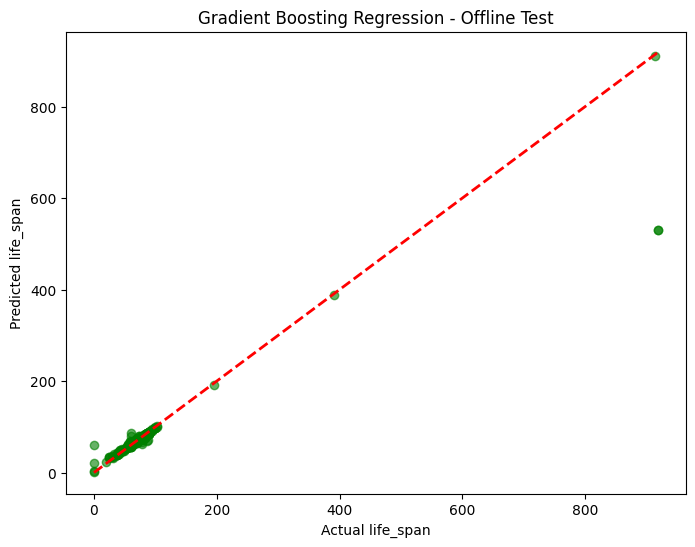

ValueError: could not convert string to float: 'John Doe'

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 1. CSV faylni yuklash
file_path = r"C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Data\Feature_selection\Filtered_Features.csv"
df = pd.read_csv(file_path)

# 2. Target va features ajratish
y = df['life_span']
X = df.drop(columns=['life_span'])

# 3. Numerical va categorical ustunlarni aniqlash
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 4. ColumnTransformer: numerical = scaling, categorical = one-hot encoding
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# 5. Pipeline yaratish
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        random_state=42
    ))
])

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Pipeline fit qilish
pipeline.fit(X_train, y_train)

# 8. Test set bilan baholash
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Offline Test R2: {r2:.4f}, RMSE: {rmse:.4f}")

# 9. Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual life_span")
plt.ylabel("Predicted life_span")
plt.title("Gradient Boosting Regression - Offline Test")
plt.show()

# 10. Offline data yaratish
offline_data = pd.DataFrame({
    'name': ['John Doe'],
    'birth_date': ['1990-01-01'],
    'birth_place': ['City, Country'],
    'death_date': ['2070-01-01'],
    'death_place': ['City, Country'],
    'occupation': ['Scientist'],
    'awards': ['None'],
    'alma_mater': ['University Name'],
    'education': ['PhD'],
    'spouse': ['Jane Doe'],
    'children': ['2'],
    'occupation_cluster': [2],
    'birth_year': [1990.0],
    'death_year': [2070.0],
    'life_span_cluster': [2.0],
    'edu_award_cluster': [3],
    'bio_cluster': [1],
    'Unnamed: 0.1': [0],
    'Unnamed: 0': [0]
})

# 11. Offline data ustunlarini fit qilingan X ustunlari bilan moslashtirish
offline_data_aligned = offline_data.reindex(columns=X_train.columns, fill_value=0)

# 12. Bashorat qilish
predicted_life_span = pipeline.predict(offline_data_aligned)
print(f"Offline data uchun bashorat qilingan life_span: {predicted_life_span[0]:.2f}")

# 13. Pipeline saqlash
save_path = r"C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Models\Pipeline_GradientBoosting_Full.joblib"
joblib.dump(pipeline, save_path)
print(f"Pipeline muvaffaqiyatli saqlandi: {save_path}")


In [62]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 1. CSV faylni yuklash
file_path = r"C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Data\Feature_selection\Filtered_Features.csv"
df = pd.read_csv(file_path)

# 2. Target va features ajratish
y = df['life_span']
X = df.drop(columns=['life_span'])

# 3. Numerical va categorical ustunlarni aniqlash
numerical_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 4. ColumnTransformer: numerical = scaling, categorical = one-hot encoding
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# 5. Pipeline yaratish
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        random_state=42
    ))
])

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Pipeline fit qilish
pipeline.fit(X_train, y_train)

# 8. Test set bilan baholash
y_pred = pipeline.predict(X_test)
print(f"R2: {r2_score(y_test, y_pred):.4f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


# 10. Offline data (barcha ustunlar bo'yicha)
offline_data = pd.DataFrame({
    col: [0] if col in numerical_cols else ['John Doe'] for col in X.columns
})

# 11. Bashorat qilish
predicted_life_span = pipeline.predict(offline_data)
print(f"Offline data uchun bashorat qilingan life_span: {predicted_life_span[0]:.2f}")

# 12. Pipeline saqlash
save_path = r"C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Models\Pipeline_GradientBoosting_Full.joblib"
joblib.dump(pipeline, save_path)
print(f"Pipeline muvaffaqiyatli saqlandi: {save_path}")


R2: 0.8697, RMSE: 27.6077
Offline data uchun bashorat qilingan life_span: 129.12
Pipeline muvaffaqiyatli saqlandi: C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Models\Pipeline_GradientBoosting_Full.joblib
